In [1]:
# STEP 1: Import Necessary Libraries
# Let's begin by importing the tools we need to work with our data.
# These libraries help us handle data, create visualizations, and build our model.

import pandas as pd  # For handling data in tables
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating graphs
import seaborn as sns  # For prettier graphs
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.ensemble import RandomForestRegressor  # Our chosen machine learning model
from sklearn.metrics import mean_squared_error, r2_score  # To evaluate our model's performance

# STEP 2: Load the Dataset
# Now, we load the dataset. Make sure the file is in the same folder as this notebook or provide the correct path.

data = pd.read_csv('retail_price.csv')  # Replace 'retail_price.csv' with your file's path if needed

# Let's preview the first few rows of the data to understand its structure.
print("First 5 rows of the dataset:")
data.head()


First 5 rows of the dataset:


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [3]:
# STEP 3: Understand the Dataset
# We'll check the column names and their data types.
print("\nColumn Names and Data Types:")
print(data.dtypes)

# Check for missing values.
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())

# Generate a statistical summary for numerical columns.
print("\nStatistical Summary of the Dataset:")
print(data.describe())

# Display the dataset shape to see how many rows and columns we have.
print(f"\nDataset Shape: {data.shape}")



Column Names and Data Types:
product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                 

In [4]:
"""
- The average 'unit_price' is 106.50, with prices ranging from 19.90 to 364.00.
- The average 'product_score' is 4.08, indicating that most products have good customer ratings.
- Competitor prices ('comp_1', 'comp_2', 'comp_3') vary significantly, suggesting competitive market dynamics.
- These variations provide a strong foundation for analyzing pricing strategies.
"""

"\n- The average 'unit_price' is 106.50, with prices ranging from 19.90 to 364.00.\n- The average 'product_score' is 4.08, indicating that most products have good customer ratings.\n- Competitor prices ('comp_1', 'comp_2', 'comp_3') vary significantly, suggesting competitive market dynamics.\n- These variations provide a strong foundation for analyzing pricing strategies.\n"

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


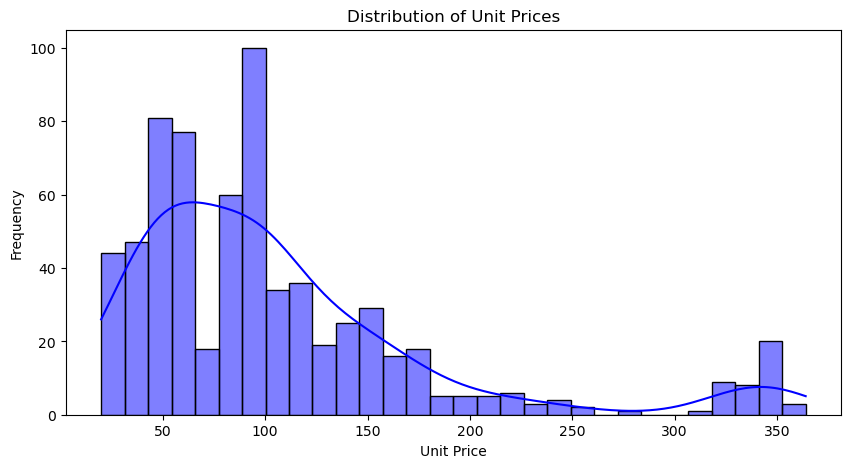

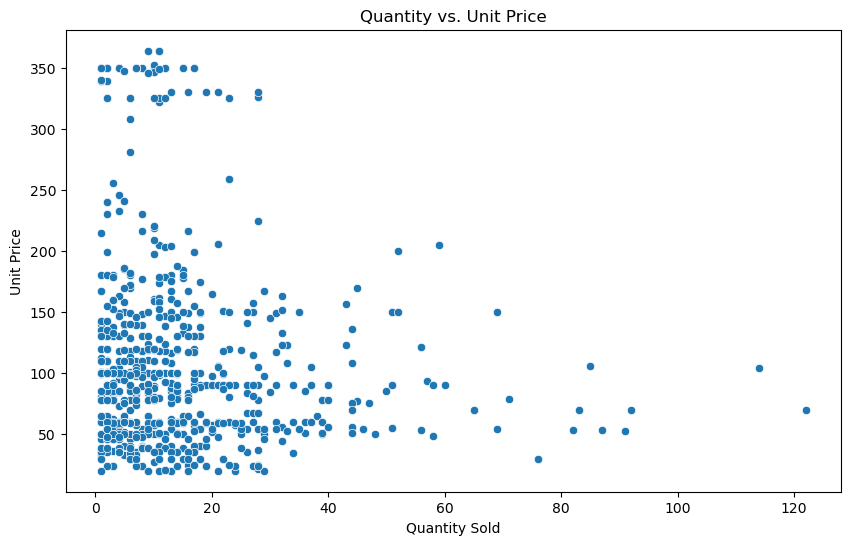

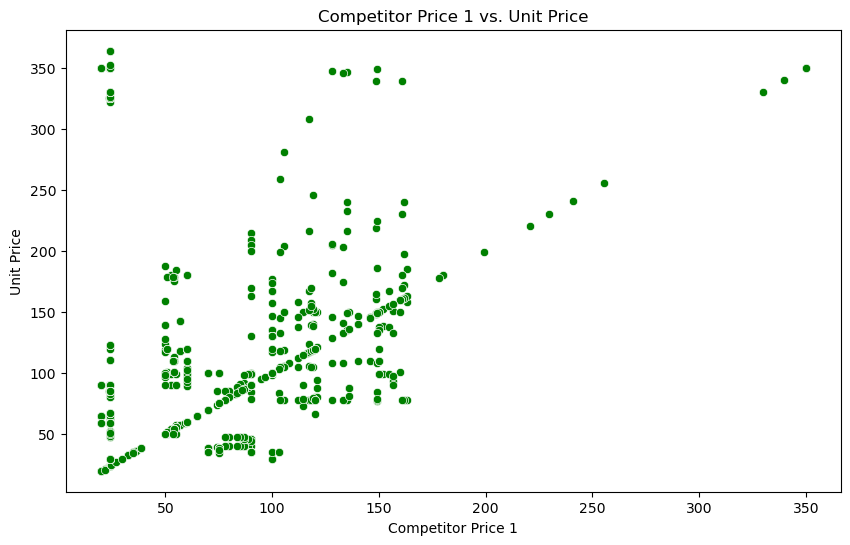

In [5]:
# STEP 4: Data Visualization
# Let's look at how "unit_price" is distributed.
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='unit_price', kde=True, bins=30, color='blue')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

# Now, let's visualize how "quantity" (qty) varies with "unit_price".
plt.figure(figsize=(10, 6))
sns.scatterplot(x='qty', y='unit_price', data=data)
plt.title('Quantity vs. Unit Price')
plt.xlabel('Quantity Sold')
plt.ylabel('Unit Price')
plt.show()

# We can also look at the competitor pricing to understand their impact on unit price.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comp_1', y='unit_price', data=data, color='green')
plt.title('Competitor Price 1 vs. Unit Price')
plt.xlabel('Competitor Price 1')
plt.ylabel('Unit Price')
plt.show()


In [6]:
"""
INSIGHTS:
- The majority of unit prices fall between 50 and 150.
- A few higher-priced products exist (up to 350), but they are less frequent, suggesting premium or niche products.
- The peak of the histogram near 100 indicates a common pricing point, potentially reflecting a standard pricing strategy.
- The spread of prices suggests a mix of budget, mid-range, and premium products in the dataset.
"""

"""
INSIGHTS:
- An inverse relationship is observed between quantity sold and unit price:
  - Lower-priced products tend to sell in larger quantities.
  - Higher-priced products are sold in smaller quantities, aligning with expected consumer behavior.
- A few outliers show high-priced products sold in large quantities, possibly indicating popular or high-value items.
- This relationship highlights the impact of demand elasticity: as prices increase, demand decreases.
"""

"""
INSIGHTS:
- A strong positive correlation exists between Competitor Price 1 and Unit Price:
  - As the competitor’s price increases, the product’s unit price also tends to increase.
  - This suggests that pricing decisions are closely aligned with this competitor’s pricing strategy.
- Many data points align along the diagonal, indicating the company often prices slightly below or in line with the competitor.
- Outliers with significant deviations (either higher or lower prices) could reflect aggressive pricing or premium products.
"""


'\nINSIGHTS:\n- A strong positive correlation exists between Competitor Price 1 and Unit Price:\n  - As the competitor’s price increases, the product’s unit price also tends to increase.\n  - This suggests that pricing decisions are closely aligned with this competitor’s pricing strategy.\n- Many data points align along the diagonal, indicating the company often prices slightly below or in line with the competitor.\n- Outliers with significant deviations (either higher or lower prices) could reflect aggressive pricing or premium products.\n'

In [7]:
# STEP 5: Data Cleaning and Preprocessing
# There are no missing values, but we'll confirm this one more time.
if data.isnull().sum().sum() == 0:
    print("\nNo missing values. Dataset is clean!")
else:
    print("\nThere are missing values. Handling them now.")
    # Fill missing numerical values with the median
    data = data.fillna(data.median())

# For simplicity, we will focus on features related to pricing and competitors.
# We'll drop columns that are irrelevant to our task (e.g., IDs, text-based columns).
columns_to_keep = ['qty', 'unit_price', 'comp_1', 'comp_2', 'comp_3', 'product_score']
data_cleaned = data[columns_to_keep]

# Display the cleaned data
print("\nCleaned Dataset:")
data_cleaned.head()



No missing values. Dataset is clean!

Cleaned Dataset:


,qty,unit_price,comp_1,comp_2,comp_3,product_score
0,1,45.95,89.9,215.000000,45.95,4.0
1,3,45.95,89.9,209.000000,45.95,4.0
2,6,45.95,89.9,205.000000,45.95,4.0
3,4,45.95,89.9,199.509804,45.95,4.0
4,2,45.95,89.9,163.398710,45.95,4.0


In [8]:
# STEP 6: Splitting the Data
# X contains the features we will use to make predictions.
# y is the target variable, which we are trying to predict (unit_price).

X = data_cleaned.drop('unit_price', axis=1)  # Features
y = data_cleaned['unit_price']  # Target

# Split the data into training and testing sets (70% training, 30% testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")



Training Set Size: (473, 5)
Testing Set Size: (203, 5)


In [9]:
# STEP 7: Training the Model
# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)
print("\nModel training complete!")



Model training complete!


In [10]:
# STEP 8: Model Evaluation
# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")

# Insights:
# - A lower MSE indicates that the model's predictions are close to the actual values.
# - An R² value closer to 1 means the model explains most of the variance in the target variable.



Model Evaluation Metrics:
Mean Squared Error (MSE): 2558.25
R-squared Score (R²): 0.58


In [11]:
"""
INSIGHT:
- MSE (2558.25): This measures the average squared difference between the predicted and actual prices. While the value is moderate, it indicates that the model performs reasonably well in predicting prices but has room for improvement.
- R² (0.58): This means that 58% of the variation in product pricing is explained by the model. While not perfect, this shows the model captures meaningful relationships between features and pricing.
- Overall, the model provides a solid foundation for price optimization, but additional refinement could improve performance.
"""

'\nINSIGHT:\n- MSE (2558.25): This measures the average squared difference between the predicted and actual prices. While the value is moderate, it indicates that the model performs reasonably well in predicting prices but has room for improvement.\n- R² (0.58): This means that 58% of the variation in product pricing is explained by the model. While not perfect, this shows the model captures meaningful relationships between features and pricing.\n- Overall, the model provides a solid foundation for price optimization, but additional refinement could improve performance.\n'


Feature Importance:
         Feature  Importance
2         comp_2    0.360891
4  product_score    0.217419
0            qty    0.176137
3         comp_3    0.143593
1         comp_1    0.101959


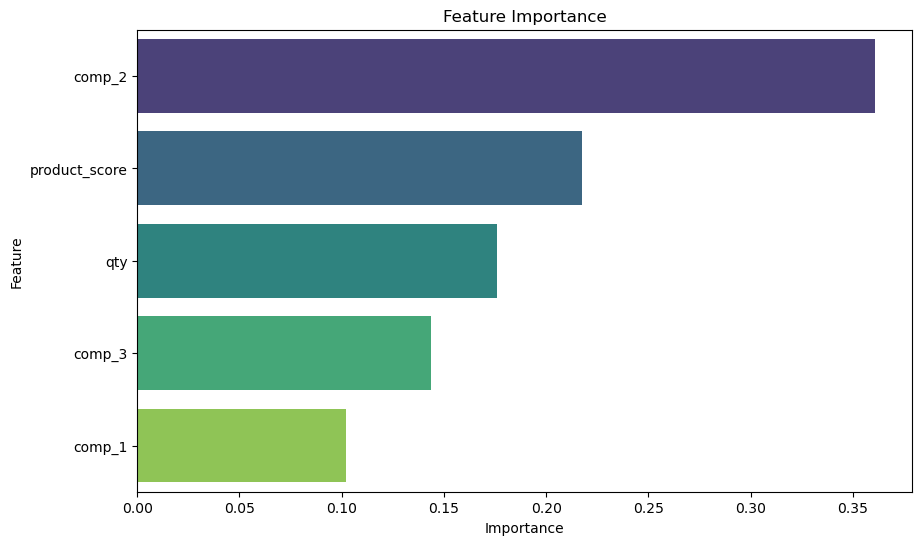

In [12]:
# STEP 9: Feature Importance
# Extract feature importance from the model
importances = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()


In [13]:
"""
INSIGHT:
Feature importance highlights the key factors influencing pricing:
1. 'comp_2' (36.1%): The second competitor's pricing is the most influential, suggesting the need to closely monitor this competitor's strategies.
2. 'product_score' (21.7%): Customer preferences significantly impact pricing. Products with higher ratings can command premium prices.
3. 'qty' (17.6%): Demand (quantity sold) plays a critical role in determining prices, aligning with the concept of demand elasticity.
4. 'comp_3' (14.4%) and 'comp_1' (10.2%): Other competitor prices also impact pricing but to a lesser degree.

This confirms that the model aligns with the task of optimizing pricing based on competitor pricing, customer preferences, and demand.
"""

"""
INSIGHT:
The bar chart visually emphasizes that:
- 'comp_2' and 'product_score' are the most critical factors.
- Strategies should prioritize competitor pricing and customer satisfaction to achieve optimal pricing decisions.
"""

"\nINSIGHT:\nThe bar chart visually emphasizes that:\n- 'comp_2' and 'product_score' are the most critical factors.\n- Strategies should prioritize competitor pricing and customer satisfaction to achieve optimal pricing decisions.\n"

In [14]:
# Since the results show that the current Random Forest model explains 58% of the variation in pricing (R² = 0.58)
# and has a Mean Squared Error (MSE) of 2558.25, we would like to fine-tune the model to improve its performance.
# Fine-tuning involves optimizing key hyperparameters to help the model better capture the relationships in the data.

# STEP 10: Fine-Tuning the Random Forest Model with Grid Search
from sklearn.model_selection import GridSearchCV

# 1. Define the Parameter Grid
# Here, we specify the range of values for key hyperparameters to test during the tuning process.
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}

# 2. Initialize the Random Forest Model
# This is the same model we used earlier, but now it will undergo fine-tuning.
rf = RandomForestRegressor(random_state=42)

# 3. Set Up the Grid Search
# GridSearchCV will try all combinations of the parameters in param_grid, 
# using cross-validation to evaluate each one.
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=3,  # 3-fold cross-validation to ensure robust evaluation
    scoring='neg_mean_squared_error',  # Optimizing for the lowest Mean Squared Error
    verbose=2,  # This will display progress as the search is performed
    n_jobs=-1  # Use all available CPU cores to speed up the process
)

# 4. Train the Grid Search
# Now, we'll train the model on the training data using the defined parameter grid.
print("Starting Grid Search to fine-tune the Random Forest model...")
grid_search.fit(X_train, y_train)

# STEP 11: Evaluating the Results of Grid Search
# Once Grid Search is complete, we can view the best hyperparameters and the corresponding score.
print("\nBest Parameters Found by Grid Search:")
print(grid_search.best_params_)

# The best score returned by Grid Search is negative because we're optimizing for "negative MSE".
print("\nBest Negative Mean Squared Error (MSE):")
print(-grid_search.best_score_)

"""
INSIGHTS:
- The Grid Search will identify the optimal combination of parameters for the Random Forest model.
- These parameters, such as the number of trees (n_estimators) or the depth of each tree (max_depth), 
  help the model better fit the data without overfitting or underfitting.
- A lower MSE score after fine-tuning indicates that the model predicts pricing more accurately.
"""

# STEP 12: Using the Optimized Model to Make Predictions
# We can now retrieve the best model from the grid search and test it on the unseen test data.
best_rf = grid_search.best_estimator_  # Retrieve the best model
y_pred_optimized = best_rf.predict(X_test)  # Make predictions on the test set

# Evaluate the optimized model
optimized_mse = mean_squared_error(y_test, y_pred_optimized)
optimized_r2 = r2_score(y_test, y_pred_optimized)

print(f"\nOptimized Model Performance:")
print(f"Mean Squared Error (MSE): {optimized_mse:.2f}")
print(f"R-squared Score (R²): {optimized_r2:.2f}")

"""
INSIGHTS:
- The optimized model will likely have a lower Mean Squared Error (MSE) compared to the default model, 
  indicating more accurate predictions.
- A higher R-squared (R²) score suggests that the model explains more of the variance in product pricing.
- These improvements highlight the value of fine-tuning, as even small adjustments in hyperparameters 
  can significantly enhance the model's performance.
"""

# STEP 13: Comparing the Default Model with the Optimized Model
# Let's compare the performance metrics of the default and optimized models.
print("\nComparison of Model Performance:")
print(f"Default Model MSE: {mse:.2f}, Optimized Model MSE: {optimized_mse:.2f}")
print(f"Default Model R²: {r2:.2f}, Optimized Model R²: {optimized_r2:.2f}")

"""
INSIGHTS:
- This comparison shows how much improvement was achieved through fine-tuning.
- If the optimized model shows a significantly lower MSE and higher R², 
  it confirms that fine-tuning was effective and improved the model's ability to predict pricing accurately.
- However, if improvements are marginal, we might consider trying alternative models 
  such as Gradient Boosting (e.g., XGBoost or LightGBM) for further optimization.
"""


Starting Grid Search to fine-tune the Random Forest model...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Parameters Found by Grid Search:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best Negative Mean Squared Error (MSE):
2097.291701423545

Optimized Model Performance:
Mean Squared Error (MSE): 2482.15
R-squared Score (R²): 0.59

Comparison of Model Performance:
Default Model MSE: 2558.25, Optimized Model MSE: 2482.15
Default Model R²: 0.58, Optimized Model R²: 0.59


"\nINSIGHTS:\n- This comparison shows how much improvement was achieved through fine-tuning.\n- If the optimized model shows a significantly lower MSE and higher R², \n  it confirms that fine-tuning was effective and improved the model's ability to predict pricing accurately.\n- However, if improvements are marginal, we might consider trying alternative models \n  such as Gradient Boosting (e.g., XGBoost or LightGBM) for further optimization.\n"

Training the XGBoost Regressor...

XGBoost Model Performance:
Mean Squared Error (MSE): 2670.91
R-squared Score (R²): 0.56

Plotting Feature Importance for XGBoost...


<Figure size 1000x800 with 0 Axes>

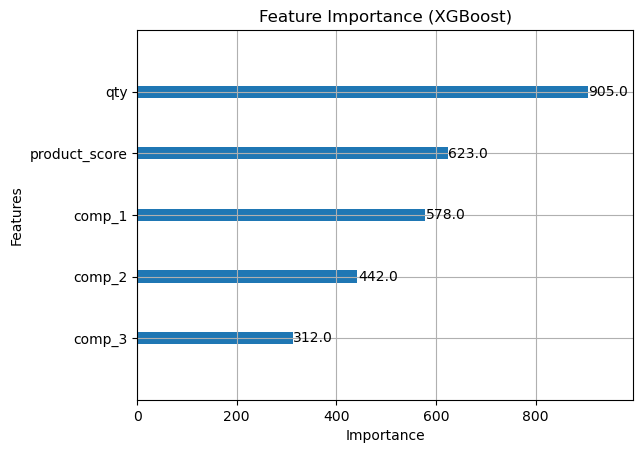


Comparison of Models:
Random Forest Optimized MSE: 2482.15, XGBoost MSE: 2670.91
Random Forest Optimized R²: 0.59, XGBoost R²: 0.56


'\nNEXT STEPS:\n1. If XGBoost performs better:\n   - Consider fine-tuning XGBoost using techniques like Grid Search or Randomized Search.\n   - Fine-tune hyperparameters such as `n_estimators`, `learning_rate`, `max_depth`, and `subsample`.\n2. If XGBoost performance is similar:\n   - Explore further feature engineering to enhance predictive power.\n   - Add additional features, remove irrelevant ones, or create interaction terms.\n3. If Random Forest performs better:\n   - Stick with Random Forest as the primary model and further refine feature selection or engineering.\n'

In [15]:
# Since fine-tuning the Random Forest model brought marginal improvements (MSE reduced from 2558.25 to 2482.15, R² improved slightly from 0.58 to 0.59),
# we will now explore an alternative model: Gradient Boosting using XGBoost.
# Gradient Boosting is well-known for its ability to capture complex relationships in data
# and often performs better in regression tasks, especially for structured/tabular datasets.

# STEP 14: Installing and Importing XGBoost
# First, ensure XGBoost is installed (uncomment the line below if you need to install it).
# !pip install xgboost

!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# STEP 15: Initialize the XGBoost Regressor
# We are starting with default hyperparameters and will evaluate the model's performance before fine-tuning.
xgb_model = XGBRegressor(
    objective='reg:squarederror',  # Use squared error as the loss function for regression
    random_state=42,  # For reproducibility
    n_estimators=100,  # Default number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage (default)
    max_depth=6  # Maximum depth of a tree (default)
)

# STEP 16: Train the Model
# Train the XGBoost model on the training data
print("Training the XGBoost Regressor...")
xgb_model.fit(X_train, y_train)

# STEP 17: Evaluate the Model
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate performance metrics
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Model Performance:")
print(f"Mean Squared Error (MSE): {xgb_mse:.2f}")
print(f"R-squared Score (R²): {xgb_r2:.2f}")

"""
INSIGHTS:
- The XGBoost model's performance metrics (MSE and R²) will give us an idea of whether this model performs better than the fine-tuned Random Forest.
- A lower MSE and a higher R² would indicate that XGBoost is more effective in capturing the patterns in the data.
"""

# STEP 18: Feature Importance in XGBoost
# XGBoost provides a built-in way to assess feature importance
import matplotlib.pyplot as plt
from xgboost import plot_importance

print("\nPlotting Feature Importance for XGBoost...")
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight', title='Feature Importance (XGBoost)', xlabel='Importance', ylabel='Features')
plt.show()

"""
INSIGHTS:
- The feature importance plot highlights the relative importance of each feature in the XGBoost model.
- Features with higher importance contribute more to the prediction of pricing.
- Use this information to assess whether certain features, such as competitor pricing or customer preferences, play a dominant role.
"""

# STEP 19: Compare XGBoost to the Random Forest Model
print("\nComparison of Models:")
print(f"Random Forest Optimized MSE: {optimized_mse:.2f}, XGBoost MSE: {xgb_mse:.2f}")
print(f"Random Forest Optimized R²: {optimized_r2:.2f}, XGBoost R²: {xgb_r2:.2f}")

"""
INSIGHTS:
- This comparison will help us decide whether XGBoost significantly outperforms the fine-tuned Random Forest model.
- If XGBoost delivers much lower MSE and higher R², it suggests this model is better suited for the task of pricing optimization.
"""

# STEP 20: Next Steps
"""
NEXT STEPS:
1. If XGBoost performs better:
   - Consider fine-tuning XGBoost using techniques like Grid Search or Randomized Search.
   - Fine-tune hyperparameters such as `n_estimators`, `learning_rate`, `max_depth`, and `subsample`.
2. If XGBoost performance is similar:
   - Explore further feature engineering to enhance predictive power.
   - Add additional features, remove irrelevant ones, or create interaction terms.
3. If Random Forest performs better:
   - Stick with Random Forest as the primary model and further refine feature selection or engineering.
"""



In [16]:
"""
INSIGHTS:
The results from the XGBoost model show that it did not perform as well as the fine-tuned Random Forest model. 
Let’s break down the results and understand why:

1. **Model Performance**:
   - XGBoost's Mean Squared Error (MSE) is **2670.91**, which is higher than the optimized Random Forest model's MSE of **2482.15**.
     This indicates that XGBoost's predictions are less accurate on this dataset compared to Random Forest.
   - The R-squared (R²) score for XGBoost is **0.56**, while the Random Forest model achieved an R² of **0.59**.
     This means XGBoost explains slightly less of the variance in product pricing compared to Random Forest.

2. **Stick with Random Forest**:
   - Random Forest currently performs better (lower MSE and higher R²).
   - We can focus on refining this model further by:
     - **Feature Engineering**: Creating new features like interaction terms (e.g., `competitor_price * product_score`).
     - **Feature Selection**: Dropping less relevant features based on importance score.
"""


"\nINSIGHTS:\nThe results from the XGBoost model show that it did not perform as well as the fine-tuned Random Forest model. \nLet’s break down the results and understand why:\n\n1. **Model Performance**:\n   - XGBoost's Mean Squared Error (MSE) is **2670.91**, which is higher than the optimized Random Forest model's MSE of **2482.15**.\n     This indicates that XGBoost's predictions are less accurate on this dataset compared to Random Forest.\n   - The R-squared (R²) score for XGBoost is **0.56**, while the Random Forest model achieved an R² of **0.59**.\n     This means XGBoost explains slightly less of the variance in product pricing compared to Random Forest.\n\n2. **Stick with Random Forest**:\n   - Random Forest currently performs better (lower MSE and higher R²).\n   - We can focus on refining this model further by:\n     - **Feature Engineering**: Creating new features like interaction terms (e.g., `competitor_price * product_score`).\n     - **Feature Selection**: Dropping les

In [17]:
pip freeze

absl-py==2.1.0
agency-swarm==0.4.1
aiobotocore @ file:///private/var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_28sh5ufai0/croot/aiobotocore_1701291514455/work
aiofiles==23.2.1
aiohttp @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_d0kuw1pu3l/croot/aiohttp_1707342310304/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-anon-usage @ file:///private/var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_73w1puz2ey/croot/anaconda-anon-usage_1697038932852/work
anaconda-catalogs @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_737qok84ed/croot/anaconda-catalogs_1685727302903/work
anaconda-cli-base @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_101_fummbm/croot/anaconda-cli-base_1731425526356/work
anaconda-client @ file:///private/var/folders/c_/qfmhj66

In [18]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [25]:
import joblib

# Save the model to a file
joblib.dump(model, 'model.pkl')

print("Model saved as model.pkl")

Model saved as model.pkl


In [27]:
import pickle

# Define the file path
file_path = "model.pkl"

# Load the model
try:
    with open(file_path, "rb") as file:
        model = pickle.load(file)
    print("Model loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file at '{file_path}' was not found.")
except pickle.UnpicklingError:
    print("Error: The file could not be unpickled. Ensure it is a valid .pkl file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Model loaded successfully!


In [30]:
from flask import Flask, request, jsonify, render_template
import pickle
import numpy as np

app = Flask(__name__)

# Load the model
model_path = "model.pkl"
try:
    with open(model_path, "rb") as file:
        model = pickle.load(file)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading the model: {e}")

@app.route('/')
def home():
    return render_template('index.html')  # This will render your HTML form

@app.route('/predict', methods=['POST'])
def predict():
    # Extracting data from the form
    try:
        features = [
            float(request.form['product_id']),
            float(request.form['category_name']),
            float(request.form['quantity']),
            float(request.form['total_price']),
            float(request.form['freight_price']),
            float(request.form['name_length']),
            float(request.form['description_length']),
            float(request.form['photo_quantity']),
            float(request.form['weight']),
            float(request.form['score']),
            float(request.form['customers']),
            int(request.form['weekday']),
            int(request.form['weekend']),
            int(request.form['holiday']),
            int(request.form['month']),
            int(request.form['year']),
            float(request.form['s']),
            float(request.form['volume']),
            float(request.form['comp1']),
            float(request.form['fp1']),
            float(request.form['comp2']),
            float(request.form['ps2']),
            float(request.form['fp2']),
            float(request.form['comp3']),
            float(request.form['ps3']),
            float(request.form['fp3']),
            float(request.form['lag_price'])
        ]
        
        # Reshape for prediction
        input_array = np.array(features).reshape(1, -1)
        
        # Make prediction
        prediction = model.predict(input_array)
        return jsonify({'Predicted Price': prediction[0]})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)


Model loaded successfully!
 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 991, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File

SystemExit: 1

In [21]:
from flask import Flask, request, jsonify
import pandas as pd

# Initialize Flask app
app = Flask(__name__)

# Load the trained model (ensure 'model.pkl' exists in the folder)
model = joblib.load('model.pkl')

@app.route('/')
def home():
    return "Welcome to the Pricing Optimization API!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON input
        data = request.get_json()
        # Convert input to DataFrame
        input_df = pd.DataFrame(data)
        # Make predictions
        predictions = model.predict(input_df)
        # Return predictions as JSON
        return jsonify({'predictions': predictions.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    # Run the Flask app
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.39:5000
Press CTRL+C to quit


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estima

In [ ]:
gunicorn --bind 0.0.0.0:5000 pricing-optimization-app:app